In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install tensorflow==2.12.0 --no-cache-dir
!pip install tensorflow-addons==0.19.0 --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.8 MB/s eta 0:00:00


In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.2 MB/s eta 0:00:00


In [ ]:
import cv2

In [ ]:
#Loading Dataset:
!pip install -q kaggle


In [ ]:
#then move the .zip file into drive from /content
#!cp /content/chest-xray-masks-and-labels.zip /content/drive/MyDrive

In [ ]:
%mkdir dataset
%mkdir dataset/images # for source images
%mkdir dataset/masks # for annotation masks
%mkdir dataset/test # for test images
%mkdir dataset/temp # temp storage


In [ ]:
# start the download, get from google drive
!kaggle datasets download 'nikhilpandey360/chest-xray-masks-and-labels'

Dataset URL: https://www.kaggle.com/datasets/nikhilpandey360/chest-xray-masks-and-labels
License(s): CC0-1.0
100% 9.56G/9.58G [02:28<00:00, 167MB/s]
100% 9.58G/9.58G [02:28<00:00, 69.0MB/s]


In [ ]:
#move the zip file to my google drive
#first mount google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#get the zip file from the drive, download
#!cp /content/drive/MyDrive/chexmasks.zip /content/dataset.zip

In [ ]:
!unzip chest-xray-masks-and-labels.zip -d dataset/temp/

Archive:  chest-xray-masks-and-labels.zip
  inflating: dataset/temp/Lung Segmentation/.ipynb_checkpoints/Montgomery-checkpoint.ipynb  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0001_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0002_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0003_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0004_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0005_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0006_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0007_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0008_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0009_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0010_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0011_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0012_0.png  
 

In [ ]:
%ls dataset/temp/Lung\ Segmentation

ClinicalReadings/  masks/                       NLM-MontgomeryCXRSet-ReadMe.pdf
CXR_png/           NLM-ChinaCXRSet-ReadMe.docx  test/


In [ ]:
%mv dataset/temp/Lung\ Segmentation/CXR_png/* dataset/images/
IMAGE_PATH = "/content/dataset/images/"

In [ ]:
%mv dataset/temp/Lung\ Segmentation/CXR_png/* dataset/masks/
MASK_PATH = '/content/dataset/masks/'
%mv dataset/temp/Lung\ Segmentation/CXR_png/* dataset/test/
TEST_PATH = '/content/dataset/test/'

mv: cannot stat 'dataset/temp/Lung Segmentation/CXR_png/*': No such file or directory
mv: cannot stat 'dataset/temp/Lung Segmentation/CXR_png/*': No such file or directory


In [ ]:
%mkdir /content/transformed_images

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

image_dir = '/content/dataset/images'  # Path to your images folder
output_dir = '/content/dataset/transformed_images'  # Where to save the transformed components
os.makedirs(output_dir, exist_ok=True)

num=40

image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])[:num]

In [ ]:
%mv dataset/temp/Lung\ Segmentation/masks/* dataset/masks/
MASK_PATH = '/content/dataset/masks/'

In [ ]:
MASK_PATH = '/content/dataset/masks/'
TEST_PATH = '/content/dataset/test/'

In [ ]:
# importing os module
import os

# suffix cropping function
def rchop(s, suffix):
    if suffix and s.endswith(suffix):
        return s[:-len(suffix)]
    return s

suffix = "_mask.png"

# iterate over all mask images and edit the file-names
for count, filename in enumerate(os.listdir("/content/dataset/masks")):
  src = "/content/dataset/masks/" + filename
  res = rchop(src, suffix)
  dst = ""
  if src != res:
    dst = rchop(src, suffix) + ".png"
    os.rename(src, dst)

In [ ]:
# check the number of files in the images/ and masks/ directories
import os.path

print("number of files in images/ directory: " + str(len([name for name in os.listdir("/content/dataset/images/")])))
print("number of files in masks/ directory: " + str(len([name for name in os.listdir("/content/dataset/masks/")])))


number of files in images/ directory: 800
number of files in masks/ directory: 704


In [ ]:
# function to confirm the existence of a file in a given directory
def searchFile(fileName, TARGET_PATH):
  for root, dirs, files in os.walk(TARGET_PATH):
    for Files in files:
      #print(Files)
      found = Files.find(fileName)
      if found != -1:
        break
  return found

In [ ]:
%mkdir /content/dataset/orphan_images

In [ ]:
# clean up the images/ directory by removing all images that do not have a mask
import shutil

cnt = 0

for count, filename in enumerate(os.listdir("/content/dataset/images")):
  found = searchFile(filename, MASK_PATH)
  if found == -1:
    cnt = cnt + 1
    src = "/content/dataset/images/" + filename
    dst = "/content/dataset/orphan_images/" + filename
    dest = shutil.move(src, dst)
print("number of files not matched: " + str(cnt))

number of files not matched: 96


In [ ]:
# confirm consistency
print("number of files in images/ directory: " + str(len([name for name in os.listdir("/content/dataset/images/")])))
print("number of files in masks/ directory: " + str(len([name for name in os.listdir("/content/dataset/masks/")])))

number of files in images/ directory: 704
number of files in masks/ directory: 704


Make proper accurate splits of data

In [ ]:
import os
import shutil
import random

# Assuming the previous code has already been executed, and the following directories are set up:
IMAGE_PATH = '/content/dataset/images/'
MASK_PATH = '/content/dataset/masks/'
TEST_PATH = '/content/dataset/test/'

# Create the test directory if it doesn't exist
os.makedirs(TEST_PATH, exist_ok=True)

# Get all image filenames
all_images = sorted([f for f in os.listdir(IMAGE_PATH) if f.endswith('.png')])

# Calculate 10% for the test split
num_test = int(len(all_images) * 0.1)

# Randomly select 10% of the dataset for testing
test_indices = random.sample(range(len(all_images)), num_test)

# Move selected images to the test directory
for idx in test_indices:
    src = os.path.join(IMAGE_PATH, all_images[idx])
    dst = os.path.join(TEST_PATH, all_images[idx])
    shutil.move(src, dst)

print(f"Moved {num_test} images to the test directory: {TEST_PATH}")

# Check the number of files in the test directory
print("Number of files in the test directory: " + str(len(os.listdir(TEST_PATH))))

Moved 70 images to the test directory: /content/dataset/test/
Number of files in the test directory: 70


In [ ]:
# Create the test_masks directory if it doesn't exist
TEST_MASKS_PATH = '/content/dataset/test_masks/'
os.makedirs(TEST_MASKS_PATH, exist_ok=True)

# Move corresponding masks to the test_masks directory
for idx in test_indices:
    # Get the filename of the image that was moved
    image_filename = all_images[idx]

    # The mask filename is the same as the image filename
    mask_filename = image_filename  # No changes needed to the filename
    src_mask = os.path.join(MASK_PATH, mask_filename)

    # Print debug information
    print(f"Checking for mask: {mask_filename}")
    print(f"Source mask path: {src_mask}")

    # Check if the corresponding mask exists before moving
    if os.path.exists(src_mask):
        dst_mask = os.path.join(TEST_MASKS_PATH, mask_filename)
        shutil.move(src_mask, dst_mask)
    else:
        print(f"Mask not found for image: {image_filename}")

# Check the number of files in the test_masks directory
print("Number of masks in the test_masks directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Checking for mask: CHNCXR_0109_0.png
Source mask path: /content/dataset/masks/CHNCXR_0109_0.png
Checking for mask: CHNCXR_0130_0.png
Source mask path: /content/dataset/masks/CHNCXR_0130_0.png
Checking for mask: MCUCXR_0074_0.png
Source mask path: /content/dataset/masks/MCUCXR_0074_0.png
Checking for mask: CHNCXR_0290_0.png
Source mask path: /content/dataset/masks/CHNCXR_0290_0.png
Checking for mask: CHNCXR_0004_0.png
Source mask path: /content/dataset/masks/CHNCXR_0004_0.png
Checking for mask: MCUCXR_0026_0.png
Source mask path: /content/dataset/masks/MCUCXR_0026_0.png
Checking for mask: CHNCXR_0169_0.png
Source mask path: /content/dataset/masks/CHNCXR_0169_0.png
Checking for mask: CHNCXR_0320_0.png
Source mask path: /content/dataset/masks/CHNCXR_0320_0.png
Checking for mask: CHNCXR_0289_0.png
Source mask path: /content/dataset/masks/CHNCXR_0289_0.png
Checking for mask: CHNCXR_0135_0.png
Source mask path: /content/dataset/masks/CHNCXR_0135_0.png
Checking for mask: CHNCXR_0243_0.png
Sou

In [ ]:
print("Number of files in the mask directory: " + str(len(os.listdir(MASK_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(IMAGE_PATH))))

Number of files in the mask directory: 634
Number of files in the train_image directory: 634


Testing PyWavelet Transformations

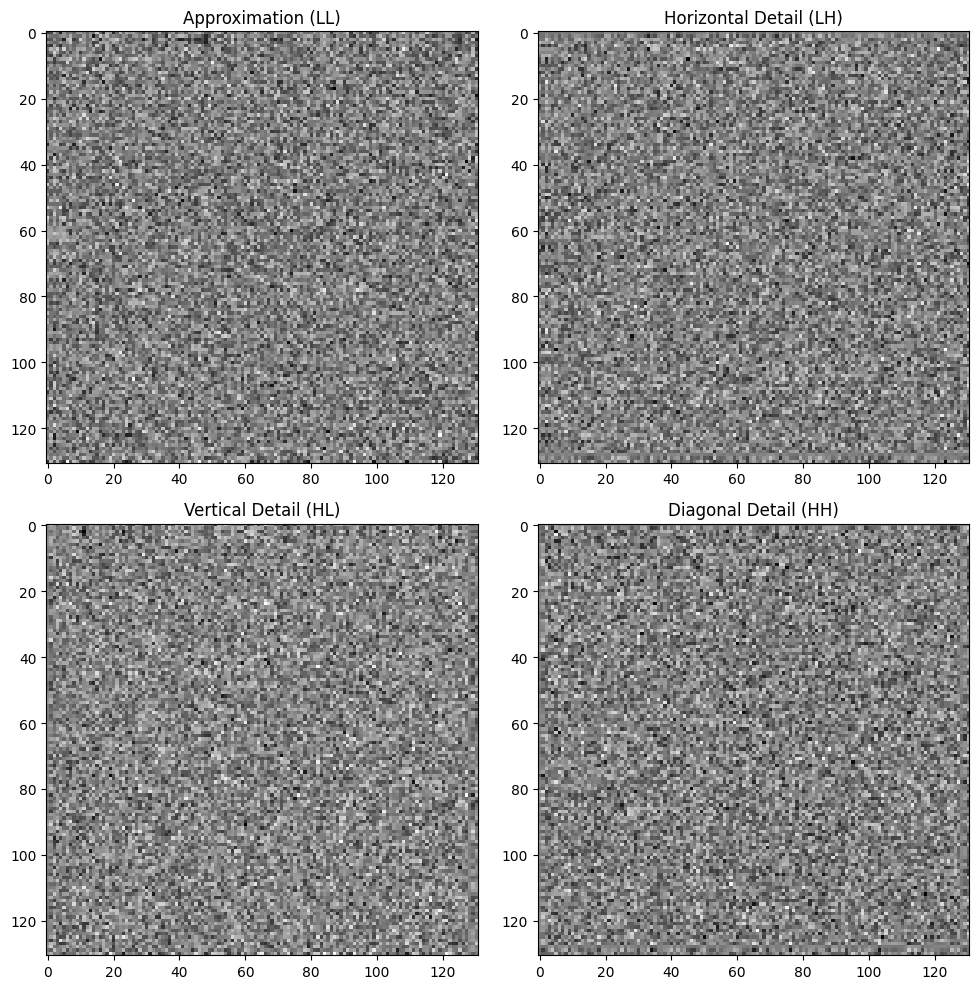

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample 2D array (image-like) for demonstration
data = np.random.rand(256, 256)

# Perform 2D Discrete Wavelet Transform using the Daubechies 4 (db4) wavelet
coeffs2 = pywt.dwt2(data, 'db4')

# The result of dwt2 is a tuple containing (LL, (LH, HL, HH))
LL, (LH, HL, HH) = coeffs2

# Plot the original and transformed coefficients
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Approximation (LL)')

plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Horizontal Detail (LH)')

plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Vertical Detail (HL)')

plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal Detail (HH)')

plt.tight_layout()
plt.show()

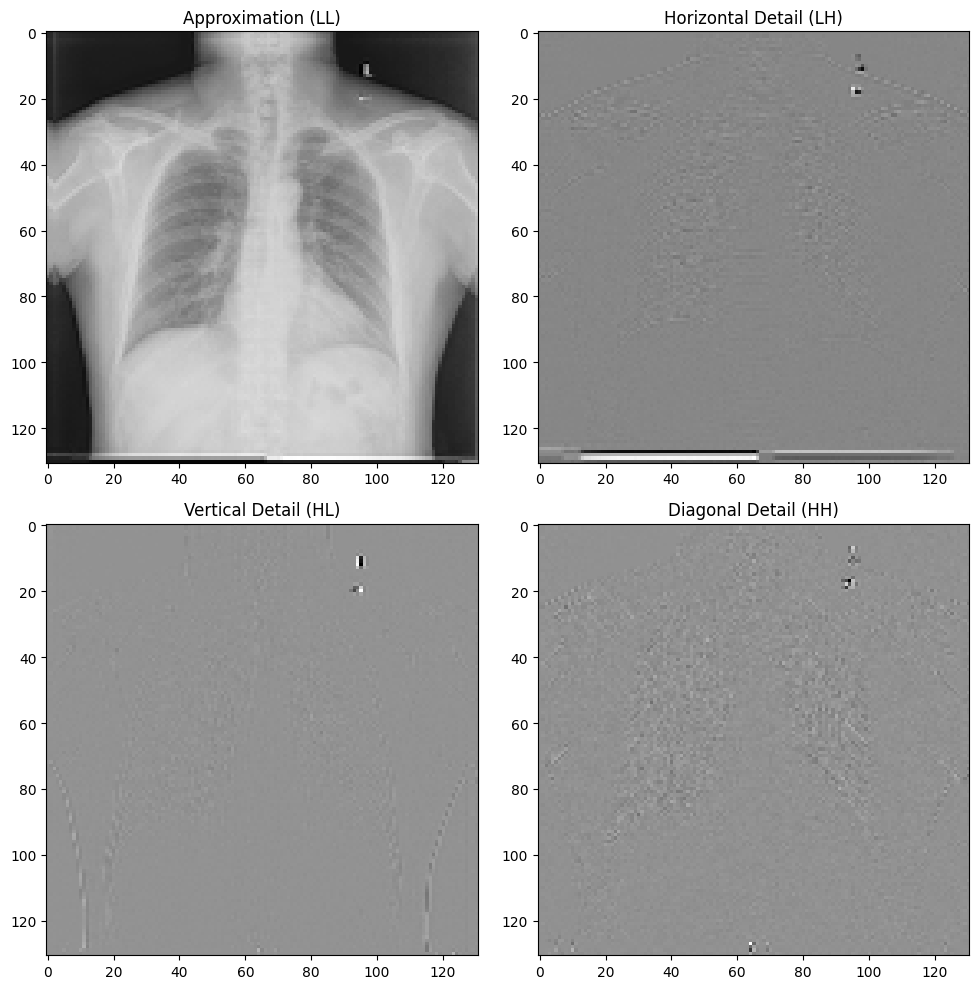

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Function to load and preprocess image
def load_image(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize image to 256x256 (if needed)
    img = cv2.resize(img, (256, 256))

    # Normalize the image data (optional but helps with numerical stability)
    img = img / 255.0

    return img

# Function to perform 2D wavelet transform and plot components
def perform_wavelet_transform(image):
    # Perform 2D Discrete Wavelet Transform using the Daubechies 4 (db4) wavelet
    coeffs2 = pywt.dwt2(image, 'db4')

    # The result of dwt2 is a tuple containing (LL, (LH, HL, HH))
    LL, (LH, HL, HH) = coeffs2

    # Plot the original and transformed coefficients
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(LL, cmap='gray')
    plt.title('Approximation (LL)')

    plt.subplot(2, 2, 2)
    plt.imshow(LH, cmap='gray')
    plt.title('Horizontal Detail (LH)')

    plt.subplot(2, 2, 3)
    plt.imshow(HL, cmap='gray')
    plt.title('Vertical Detail (HL)')

    plt.subplot(2, 2, 4)
    plt.imshow(HH, cmap='gray')
    plt.title('Diagonal Detail (HH)')

    plt.tight_layout()
    plt.show()

# TEst images in our dataset
image_path = '/content/dataset/images/CHNCXR_0002_0.png'

# Load the image
image = load_image(image_path)

# Perform wavelet transform and plot the components
perform_wavelet_transform(image)


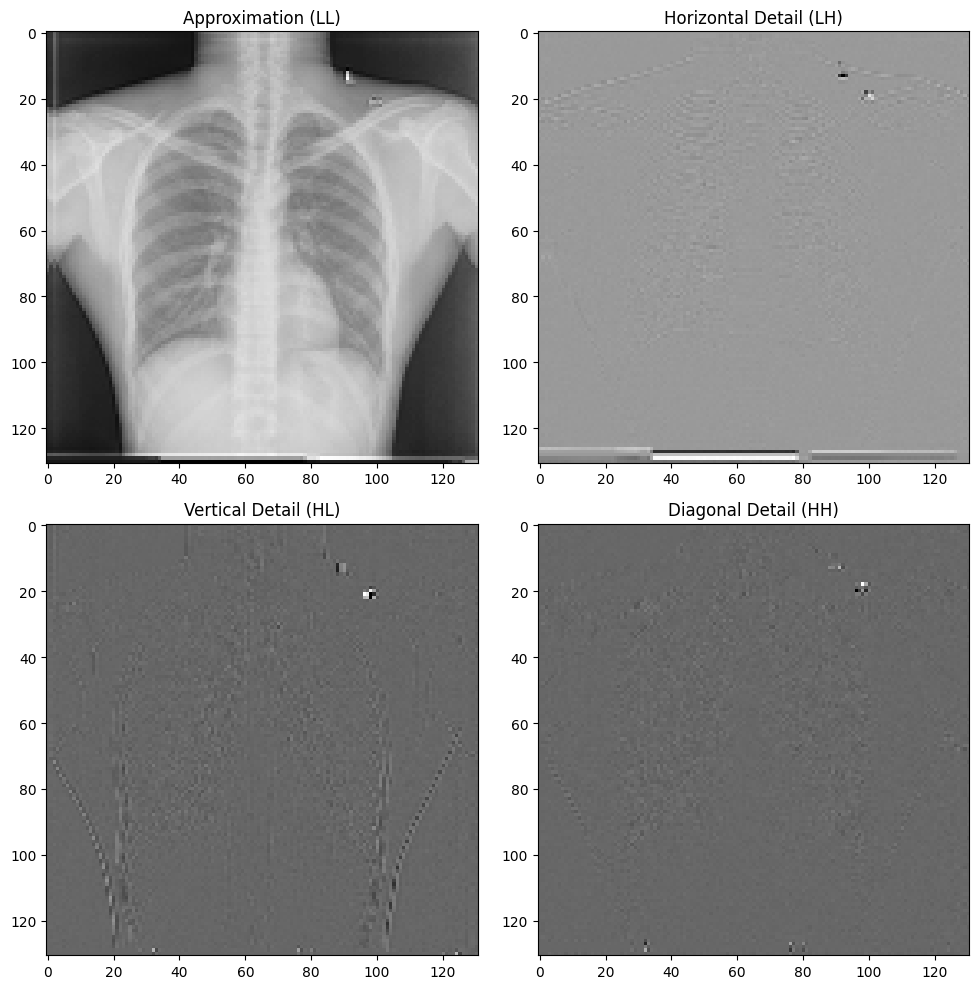

In [ ]:
# Test images in our dataset
image_path = '/content/dataset/images/CHNCXR_0005_0.png'

# Load the image
image = load_image(image_path)

# Perform wavelet transform and plot the components
perform_wavelet_transform(image)

**Data Generator:**

In [ ]:
import os
import numpy as np
import pywt
import cv2
import tensorflow as tf

class WaveletDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_folder, mask_folder, file_list, batch_size, image_size=(256, 256), wavelet='db4'):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.file_list = file_list
        self.batch_size = batch_size
        self.image_size = image_size
        self.wavelet = wavelet

    def __len__(self):
        return int(np.ceil(len(self.file_list) / self.batch_size))

    def __getitem__(self, index):
        batch_files = self.file_list[index * self.batch_size:(index + 1) * self.batch_size]

        images = np.zeros((len(batch_files), self.image_size[0], self.image_size[1], 4))
        masks = np.zeros((len(batch_files), self.image_size[0], self.image_size[1], 1))

        for i, filename in enumerate(batch_files):
            img_path = os.path.join(self.image_folder, filename)
            mask_path = os.path.join(self.mask_folder, filename)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                raise ValueError(f"Error loading image from {img_path}")
            img = cv2.resize(img, self.image_size) / 255.0

            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                raise ValueError(f"Error loading mask from {mask_path}")
            mask = cv2.resize(mask, self.image_size) / 255.0
            mask = np.expand_dims(mask, axis=-1)

            coeffs2 = pywt.dwt2(img, self.wavelet)
            LL, (LH, HL, HH) = coeffs2

            wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)
            wavelet_image = cv2.resize(wavelet_image, self.image_size)

            images[i] = wavelet_image
            masks[i] = mask

        return images, masks

Test Data generator:

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# def visualize_wavelet_components(data_gen, num_samples=5):
#     fig, axes = plt.subplots(num_samples, 5, figsize=(25, 5*num_samples))
#     titles = ['Original', 'LL', 'LH', 'HL', 'HH']

#     for i in range(num_samples):
#         # Get a sample image
#         sample_image, sample_mask = data_gen[np.random.randint(len(data_gen))]

#         # The original image can be approximated by the LL component
#         original = sample_image[0, :, :, 0]  # LL component

#         # Plot original image (approximated by LL)
#         axes[i, 0].imshow(original, cmap='gray')
#         axes[i, 0].set_title(f'Sample {i+1}: {titles[0]}')
#         axes[i, 0].axis('off')

#         # Plot wavelet components
#         for j in range(4):
#             axes[i, j+1].imshow(sample_image[0, :, :, j], cmap='gray')
#             axes[i, j+1].set_title(f'Sample {i+1}: {titles[j+1]}')
#             axes[i, j+1].axis('off')

#     plt.tight_layout()
#     plt.show()

# test_data_gen = WaveletDataGenerator(IMAGE_PATH,MASK_PATH)

# # Visualize wavelet components for 5 random samples
# visualize_wavelet_components(test_data_gen, num_samples=3)

**UNET MODEL:**

In [ ]:
# from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
# from tensorflow.keras.models import Model

# def conv_block(input_tensor, num_filters):
#     x = Conv2D(num_filters, 3, padding="same")(input_tensor)
#     x = BatchNormalization()(x)
#     x = Activation("relu")(x)

#     x = Conv2D(num_filters, 3, padding="same")(x)
#     x = BatchNormalization()(x)
#     x = Activation("relu")(x)

#     return x

# def encoder_block(input_tensor, num_filters):
#     x = conv_block(input_tensor, num_filters)
#     p = MaxPool2D((2, 2))(x)
#     return x, p

# def decoder_block(input_tensor, skip_features, num_filters):
#     x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input_tensor)
#     x = Concatenate()([x, skip_features])
#     x = conv_block(x, num_filters)
#     return x

# def build_unet(input_shape):
#     inputs = Input(input_shape)

#     s1, p1 = encoder_block(inputs, 64)
#     s2, p2 = encoder_block(p1, 128)
#     s3, p3 = encoder_block(p2, 256)
#     s4, p4 = encoder_block(p3, 512)

#     b1 = conv_block(p4, 1024)

#     d1 = decoder_block(b1, s4, 512)
#     d2 = decoder_block(d1, s3, 256)
#     d3 = decoder_block(d2, s2, 128)
#     d4 = decoder_block(d3, s1, 64)

#     outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

#     model = Model(inputs, outputs, name="U-Net")
#     return model

# # Modify input shape to (256, 256, 4) for wavelet-transformed images
# model = build_unet((256, 256, 4))

# # Compile the model
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

**NEW UNET MODEL**

In [ ]:
"""
Unet based models to perform on segmentation tasks

@author: Jeng-Chung Lien
@student id: 46232050
@email: jengchung.lien@uqconnect.edu.au
"""
import os
# Suppress the INFO message
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
from tensorflow import pow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Conv2DTranspose, concatenate, LeakyReLU, Dropout, Add, UpSampling2D
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow_addons.layers import InstanceNormalization
from tensorflow_addons.optimizers import AdamW


class SegModel:
    def __init__(self, input_shape, random_seed, model="Improved_Unet"):
        """
        Initialize SegModel class which constructs the segmentation model

        Parameters
        ----------
        input_shape : tuple
          The input shape of the model
        random_seed : integer
          The random seed to decide the random weights in the model
        model : string
          The parameter to decide which model to use.
          "Unet" is the baseline Unet model.
          "Improved_Unet" is the improved version of Unet.

        References
        ----------
        "Unet", https://arxiv.org/abs/1505.04597
        "Improved_Unet", https://arxiv.org/abs/1802.10508v1
        """
        if model == "Unet":
            self.model = self.Unet(input_shape, random_seed)
        elif model == "Improved_Unet":
            self.model = self.Improved_Unet(input_shape, random_seed)
        else:
            raise ValueError("Model doesn't exist!")

        self.history = None

    def Unet(self, input_shape, random_seed):
        """
        Function to construct the baseline Unet model

        Parameters
        ----------
        input_shape : tuple
          The input shape of the model
        random_seed : integer
          The random seed to decide the random weights in the model

        Returns
        -------
        model : Keras model class
          The baseline Unet model itself
        """
        # Initialize the random seed using he_normal
        he_norm = he_normal(seed=random_seed)

        # Left side
        inputs = Input(input_shape)
        conv1 = Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(inputs)
        conv1 = Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(conv1)
        pool1 = MaxPool2D()(conv1)

        conv2 = Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(pool1)
        conv2 = Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(conv2)
        pool2 = MaxPool2D()(conv2)

        conv3 = Conv2D(256, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(pool2)
        conv3 = Conv2D(256, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(conv3)
        pool3 = MaxPool2D()(conv3)

        conv4 = Conv2D(512, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(pool3)
        conv4 = Conv2D(512, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(conv4)
        pool4 = MaxPool2D()(conv4)

        # bridge
        conv5 = Conv2D(1024, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(pool4)
        conv5 = Conv2D(1024, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(conv5)

        # Right side
        up6 = Conv2DTranspose(512, 3, strides=2, padding='same', kernel_initializer=he_norm)(conv5)
        concat6 = concatenate([conv4, up6], axis=3)
        conv6 = Conv2D(512, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(concat6)
        conv6 = Conv2D(512, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(conv6)

        up7 = Conv2DTranspose(256, 3, strides=2, padding='same', kernel_initializer=he_norm)(conv6)
        concat7 = concatenate([conv3, up7], axis=3)
        conv7 = Conv2D(256, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(concat7)
        conv7 = Conv2D(256, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(conv7)

        up8 = Conv2DTranspose(128, 3, strides=2, padding='same', kernel_initializer=he_norm)(conv7)
        concat8 = concatenate([conv2, up8], axis=3)
        conv8 = Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(concat8)
        conv8 = Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(conv8)

        up9 = Conv2DTranspose(64, 3, strides=2, padding='same', kernel_initializer=he_norm)(conv8)
        concat9 = concatenate([conv1, up9], axis=3)
        conv9 = Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(concat9)
        conv9 = Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(conv9)

        conv10 = Conv2D(2, 3, strides=1, padding='same', activation='relu', kernel_initializer=he_norm)(conv9)
        outputs = Conv2D(1, 1, activation='sigmoid', kernel_initializer=he_norm)(conv10)

        model = Model(inputs=inputs, outputs=outputs)

        return model

    def context_module(self, filters, inputs, kernel_initializer):
        """
        Function of the context module in the Improved Unet model.
        Layers in the order of 3x3Conv, Instance Normalization, Leaky Relu, Dropout, 3x3Conv, Instance Normalization, Leaky Relu.

        Parameters
        ----------
        filters : integer
          Number of the filters of the Convolution layer
        inputs : keras layer
          The input of the context module expected from another layer's output
        kernel_initializer : keras initializers
          Random distribution to decide the random weights in the model

        Returns
        -------
        context : keras layer
          The output of the context module
        """
        context = Conv2D(filters, 3, strides=1, padding='same', kernel_initializer=kernel_initializer)(inputs)
        context = InstanceNormalization()(context)
        context = LeakyReLU(alpha=0.01)(context)
        context = Dropout(0.3)(context)
        context = Conv2D(filters, 3, strides=1, padding='same', kernel_initializer=kernel_initializer)(context)
        context = InstanceNormalization()(context)
        context = LeakyReLU(alpha=0.01)(context)

        return context

    def localization_module(self, filters, inputs, kernel_initializer):
        """
        Function of the localization module in the Improved Unet model.
        Layers in the order of 3x3Conv, Instance Normalization, Leaky Relu, 1x1Conv, Instance Normalization, Leaky Relu.

        Parameters
        ----------
        filters : integer
          Number of the filters of the Convolution layer
        inputs : keras layer
          The input of the localization module expected from another layer's output
        kernel_initializer : keras initializers
          Random distribution to decide the random weights in the model

        Returns
        -------
        local : keras layer
          The output of the localization module
        """
        local = Conv2D(filters, 3, strides=1, padding='same', kernel_initializer=kernel_initializer)(inputs)
        local = InstanceNormalization()(local)
        local = LeakyReLU(alpha=0.01)(local)
        local = Conv2D(filters, 1, strides=1, padding='same', kernel_initializer=kernel_initializer)(local)
        local = InstanceNormalization()(local)
        local = LeakyReLU(alpha=0.01)(local)

        return local

    def upsampling_module(self, filters, inputs, kernel_initializer):
        """
        Function of the upsampling module in the Improved Unet model.
        Layers in the order of size(2, 2) Upsampling, 3x3Conv, Instance Normalization, Leaky Relu.

        Parameters
        ----------
        filters : integer
          Number of the filters of the Convolution layer
        inputs : keras layer
          The input of the upsampling module expected from another layer's output
        kernel_initializer : keras initializers
          Random distribution to decide the random weights in the model

        Returns
        -------
        up : keras layer
          The output of the upsampling module
        """
        up = UpSampling2D(2)(inputs)
        up = Conv2D(filters, 3, strides=1, padding='same', kernel_initializer=kernel_initializer)(up)
        up = InstanceNormalization()(up)
        up = LeakyReLU(alpha=0.01)(up)

        return up

    def Improved_Unet(self, input_shape, random_seed):
        """
        Function to construct the Improved Unet model

        Parameters
        ----------
        input_shape : tuple
          The input shape of the model
        random_seed : integer
          The random seed to decide the random weights in the model

        Returns
        -------
        model : Keras model class
          The Improved Unet model itself
        """
        # Initialize the random seed using he_normal
        he_norm = he_normal(seed=random_seed)

        # Left side
        inputs = Input(input_shape)
        conv1 = Conv2D(16, 3, strides=1, padding='same', kernel_initializer=he_norm)(inputs)
        conv1 = InstanceNormalization()(conv1)
        conv1 = LeakyReLU(alpha=0.01)(conv1)
        context1 = self.context_module(16, inputs=conv1, kernel_initializer=he_norm)
        add1 = Add()([conv1, context1])

        conv2 = Conv2D(32, 3, strides=2, padding='same', kernel_initializer=he_norm)(add1)
        conv2 = InstanceNormalization()(conv2)
        conv2 = LeakyReLU(alpha=0.01)(conv2)
        context2 = self.context_module(32, inputs=conv2, kernel_initializer=he_norm)
        add2 = Add()([conv2, context2])

        conv3 = Conv2D(64, 3, strides=2, padding='same', kernel_initializer=he_norm)(add2)
        conv3 = InstanceNormalization()(conv3)
        conv3 = LeakyReLU(alpha=0.01)(conv3)
        context3 = self.context_module(64, inputs=conv3, kernel_initializer=he_norm)
        add3 = Add()([conv3, context3])

        conv4 = Conv2D(128, 3, strides=2, padding='same', kernel_initializer=he_norm)(add3)
        conv4 = InstanceNormalization()(conv4)
        conv4 = LeakyReLU(alpha=0.01)(conv4)
        context4 = self.context_module(128, inputs=conv4, kernel_initializer=he_norm)
        add4 = Add()([conv4, context4])

        conv5 = Conv2D(256, 3, strides=2, padding='same', kernel_initializer=he_norm)(add4)
        conv5 = InstanceNormalization()(conv5)
        conv5 = LeakyReLU(alpha=0.01)(conv5)
        context5 = self.context_module(256, inputs=conv5, kernel_initializer=he_norm)
        add5 = Add()([conv5, context5])

        # Right side
        up6 = self.upsampling_module(128, inputs=add5, kernel_initializer=he_norm)
        concat6 = concatenate([add4, up6], axis=3)
        local6 = self.localization_module(128, inputs=concat6, kernel_initializer=he_norm)

        up7 = self.upsampling_module(64, inputs=local6, kernel_initializer=he_norm)
        concat7 = concatenate([add3, up7], axis=3)
        local7 = self.localization_module(64, inputs=concat7, kernel_initializer=he_norm)

        up8 = self.upsampling_module(32, inputs=local7, kernel_initializer=he_norm)
        concat8 = concatenate([add2, up8], axis=3)
        local8 = self.localization_module(32, inputs=concat8, kernel_initializer=he_norm)

        up9 = self.upsampling_module(16, inputs=local8, kernel_initializer=he_norm)
        concat9 = concatenate([add1, up9], axis=3)
        conv9 = Conv2D(32, 3, strides=1, padding='same', kernel_initializer=he_norm)(concat9)
        conv9 = InstanceNormalization()(conv9)
        conv9 = LeakyReLU(alpha=0.01)(conv9)

        # Segmentation layers
        seg7 = Conv2D(1, 1, strides=1, padding='same', kernel_initializer=he_norm)(local7)
        seg7 = InstanceNormalization()(seg7)
        seg7 = LeakyReLU(alpha=0.01)(seg7)
        upscale7 = UpSampling2D(2)(seg7)
        seg8 = Conv2D(1, 1, strides=1, padding='same', kernel_initializer=he_norm)(local8)
        seg8 = InstanceNormalization()(seg8)
        seg8 = LeakyReLU(alpha=0.01)(seg8)
        add8 = Add()([upscale7, seg8])
        upscale8 = UpSampling2D(2)(add8)
        seg9 = Conv2D(1, 1, strides=1, padding='same', kernel_initializer=he_norm)(conv9)
        seg9 = InstanceNormalization()(seg9)
        seg9 = LeakyReLU(alpha=0.01)(seg9)
        add9 = Add()([upscale8, seg9])
        outputs = Conv2D(1, 1, activation='sigmoid', kernel_initializer=he_norm)(add9)

        model = Model(inputs=inputs, outputs=outputs)

        return model

    def summary(self):
        """
        Print the summary of the current segmentation model in SegModel class
        """
        self.model.summary()

    def train(self, X_train, X_val, y_train, y_val, optimizer, lr, loss, metrics, batch_size, epochs, lr_decay=False, decay_rate=0.985, weight_decay=0.00001, save_model=False, save_path=None, monitor='loss', mode='min'):
        """
        Function to train the current segmentation model in SegModel class

        Parameters
        ----------
        X_train : float32 numpy array
          The train set of data type float32 numpy array of the preprocessed images
        X_val : float32 numpy array
          The validation set of data type float32 numpy array of the preprocessed images
        y_train : float32 numpy array
          The train set of data type float32 numpy array of the preprocessed masks
        y_val : float32 numpy array
          The validation set of data type float32 numpy array of the preprocessed masks
        optimizer : string
          The parameter to decide which optimizer to use. "adam" is using the Adam optimizer.
        lr : float
          The parameter of the learning rate
        loss : function
          The loss function used for training
        metrics : list
          A list of metric functions to evaluate train and validation when training
        batch_size : integer
          Number of samples to take in to calculate then update weights
        epochs : integer
          Number to decide how many iterations of the model is train over the whole train data set
        lr_decay : bool
          Decide whether to use learning rate decay or not
        decay_rate : float
          The decay rate of the learning rate each epoch. Is used if lr_decay is true.
        weight_decay : float
          Decoupled weight decay parameter when using "adamW" optimizer
        save_model : bool
          Set True to enable saving the best model weights
        save_path : string
          If save_model is True. Path to save the best model weights
        monitor : string
          If save_model is True. Metric to decide the best model weights
        mode : string
          If save_model is True. Decide the 'min' or 'max' of metric value to decide the best model weights

        References
        ----------
        "adamW", https://arxiv.org/abs/1711.05101
        """
        # The learning rate epoch decay
        if lr_decay:
            length = len(X_train)
            steps = length / batch_size
            boundaries = []
            values = []
            for i in range(epochs):
                boundaries.append(int(steps * (i+1)))
                values.append(lr * pow(decay_rate, i))
            boundaries.pop()

            lr = PiecewiseConstantDecay(boundaries=boundaries, values=values)

        # Apply optimizer
        if optimizer == 'adam':
            opt = Adam(learning_rate=lr)
        elif optimizer == 'adamW':
            opt = AdamW(weight_decay=weight_decay, learning_rate=lr)
        else:
            raise ValueError("Optimizer doesn't exists!")

        # Compile model
        self.model.compile(optimizer=opt, loss=loss, metrics=metrics)
        # Train model and record training history
        if save_model:
            # Add save best model weights checkpoint
            model_checkpoint_callback = ModelCheckpoint(
                filepath=save_path,
                save_weights_only=True,
                monitor=monitor,
                mode=mode,
                save_best_only=True)
            history = self.model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback])
        else:
            history = self.model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=(X_val, y_val))
        self.history = history.history

    def predict(self, X_test, batch_size):
        """
        Function to predict masks on images using the current segmentation model in SegModel class

        Parameters
        ----------
        X_test : float32 numpy array
          The test set of data type float32 numpy array of the preprocessed images
        batch_size : integer
          Number of samples to take to predict at once

        Returns
        -------
        y_pred : float32 tensor
          Returns all the predicted masks
        """
        y_pred = self.model.predict(X_test, batch_size=batch_size)

        return y_pred

    def load_weights(self, load_path):
        """
        Function to load weights to model

        Parameters
        ----------
        load_path : string
          Path to load the model weights
        """
        self.model.load_weights(load_path)

In [ ]:
# !pip install tensorflow==2.12.0 --no-cache-dir
# !pip install tensorflow-addons==0.19.0 --no-cache-dir

In [ ]:
# Set the input shape to (256, 256, 4) for the wavelet components
input_shape = (256, 256, 4)
random_seed = 42

# Instantiate the SegModel class
seg_model = SegModel(input_shape=input_shape, random_seed=random_seed, model="Improved_Unet")

# Compile the model
# AdamW optimizer, binary crossentropy for segmentation

seg_model.model.compile(
    optimizer=AdamW(learning_rate=1e-4, weight_decay=1e-5),  # Add weight_decay parameter
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
seg_model.summary()
batch_size=4

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 256, 256, 16  592         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 instance_normalization_29 (Ins  (None, 256, 256, 16  32         ['conv2d_30[0][0]']              
 tanceNormalization)            )                                                           

**TRAINING THE MODEL:**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Split data
image_files = os.listdir(IMAGE_PATH)
train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

# Create data generators
train_data_gen = WaveletDataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=train_files,
    batch_size=batch_size
)

val_data_gen = WaveletDataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=val_files,
    batch_size=batch_size
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = seg_model.train(
    X_train=train_data_gen,
    X_val=val_data_gen,
    y_train=None,  # Not needed as the mask come from the generator
    y_val=None,
    optimizer='adam',
    lr=1e-4,
    loss='binary_crossentropy',
    metrics=['accuracy'],
    batch_size=batch_size,
    epochs=50,
    save_model=True,
    save_path="best_model.keras"
)

seg_model.model.save("NAPWUNET.h5")

Epoch 1/50
127/127 [==============================] - 670s 5s/step - loss: 0.6798 - accuracy: 0.8105 - val_loss: 0.6700 - val_accuracy: 0.9512
Epoch 2/50
127/127 [==============================] - 647s 5s/step - loss: 0.6639 - accuracy: 0.9534 - val_loss: 0.6574 - val_accuracy: 0.9633
Epoch 3/50
127/127 [==============================] - 683s 5s/step - loss: 0.6514 - accuracy: 0.9643 - val_loss: 0.6456 - val_accuracy: 0.9662
Epoch 4/50
127/127 [==============================] - 651s 5s/step - loss: 0.6395 - accuracy: 0.9693 - val_loss: 0.6337 - val_accuracy: 0.9713
Epoch 5/50
127/127 [==============================] - 646s 5s/step - loss: 0.6278 - accuracy: 0.9725 - val_loss: 0.6225 - val_accuracy: 0.9714
Epoch 6/50
127/127 [==============================] - 646s 5s/step - loss: 0.6164 - accuracy: 0.9741 - val_loss: 0.6111 - val_accuracy: 0.9740
Epoch 7/50
127/127 [==============================] - 652s 5s/step - loss: 0.6052 - accuracy: 0.9757 - val_loss: 0.6005 - val_accuracy: 0.9736

KeyboardInterrupt: 

We stopped training in between, carrying forward training in another notebook

In [ ]:
# # Early stopping callback with patience of 4 epochs
# early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# # Model checkpoint to save the best model
# model_checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)
# validation_steps=len(val_images)
# # Train the model with validation data
# history = model.fit(
#     train_data_gen,
#     validation_data=val_data_gen,
#     epochs=7,
#     steps_per_epoch=len(train_data_gen),
#     #validation_steps=validation_steps,
#     callbacks=[early_stopping, model_checkpoint],
#     verbose=2  # More detailed logging
# )

# # Save the model after training
# model.save("pywavelettedUnet.h5")

In [ ]:
# # Train the model for
# # Plotting training accuracy
# import matplotlib.pyplot as plt

# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()

AttributeError: 'NoneType' object has no attribute 'history'

In [ ]:
# # Train the model for
# # Plotting training accuracy
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='Accuracy')
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()

AttributeError: 'NoneType' object has no attribute 'history'

Get the Names of Images and masks in the test directory

In [ ]:
def get_formatted_filenames(path):
    filenames = sorted(os.listdir(path))
    formatted_names = [f"'{name}'" for name in filenames]
    return ', '.join(formatted_names)

train_image_names = get_formatted_filenames(IMAGE_PATH)
train_mask_names = get_formatted_filenames(TEST_PATH)

print("Train image names:", train_image_names)
print("Train mask names:", train_mask_names)
#move them to the new notebook

Train image names: 'CHNCXR_0001_0.png', 'CHNCXR_0002_0.png', 'CHNCXR_0003_0.png', 'CHNCXR_0005_0.png', 'CHNCXR_0006_0.png', 'CHNCXR_0007_0.png', 'CHNCXR_0008_0.png', 'CHNCXR_0009_0.png', 'CHNCXR_0010_0.png', 'CHNCXR_0011_0.png', 'CHNCXR_0012_0.png', 'CHNCXR_0013_0.png', 'CHNCXR_0014_0.png', 'CHNCXR_0015_0.png', 'CHNCXR_0017_0.png', 'CHNCXR_0018_0.png', 'CHNCXR_0019_0.png', 'CHNCXR_0020_0.png', 'CHNCXR_0021_0.png', 'CHNCXR_0022_0.png', 'CHNCXR_0023_0.png', 'CHNCXR_0024_0.png', 'CHNCXR_0026_0.png', 'CHNCXR_0027_0.png', 'CHNCXR_0028_0.png', 'CHNCXR_0029_0.png', 'CHNCXR_0030_0.png', 'CHNCXR_0031_0.png', 'CHNCXR_0032_0.png', 'CHNCXR_0034_0.png', 'CHNCXR_0035_0.png', 'CHNCXR_0041_0.png', 'CHNCXR_0042_0.png', 'CHNCXR_0043_0.png', 'CHNCXR_0044_0.png', 'CHNCXR_0045_0.png', 'CHNCXR_0046_0.png', 'CHNCXR_0047_0.png', 'CHNCXR_0048_0.png', 'CHNCXR_0049_0.png', 'CHNCXR_0050_0.png', 'CHNCXR_0051_0.png', 'CHNCXR_0052_0.png', 'CHNCXR_0053_0.png', 'CHNCXR_0056_0.png', 'CHNCXR_0057_0.png', 'CHNCXR_0058_0.

In [ ]:
#or try this, for a listing them out better
def get_filenames_as_list(path):
    filenames = sorted(os.listdir(path))
    return filenames

TEST_MASKS_PATH="/content/dataset/test_masks"

train_image_names = get_filenames_as_list(TEST_PATH)
train_mask_names = get_filenames_as_list(TEST_MASKS_PATH)

print("Train image names =", train_image_names)
print("Train mask names =", train_mask_names)

Train image names = ['CHNCXR_0004_0.png', 'CHNCXR_0016_0.png', 'CHNCXR_0033_0.png', 'CHNCXR_0054_0.png', 'CHNCXR_0055_0.png', 'CHNCXR_0088_0.png', 'CHNCXR_0103_0.png', 'CHNCXR_0105_0.png', 'CHNCXR_0109_0.png', 'CHNCXR_0117_0.png', 'CHNCXR_0124_0.png', 'CHNCXR_0130_0.png', 'CHNCXR_0135_0.png', 'CHNCXR_0159_0.png', 'CHNCXR_0168_0.png', 'CHNCXR_0169_0.png', 'CHNCXR_0238_0.png', 'CHNCXR_0243_0.png', 'CHNCXR_0245_0.png', 'CHNCXR_0277_0.png', 'CHNCXR_0281_0.png', 'CHNCXR_0282_0.png', 'CHNCXR_0285_0.png', 'CHNCXR_0289_0.png', 'CHNCXR_0290_0.png', 'CHNCXR_0320_0.png', 'CHNCXR_0338_1.png', 'CHNCXR_0378_1.png', 'CHNCXR_0380_1.png', 'CHNCXR_0411_1.png', 'CHNCXR_0420_1.png', 'CHNCXR_0421_1.png', 'CHNCXR_0430_1.png', 'CHNCXR_0431_1.png', 'CHNCXR_0449_1.png', 'CHNCXR_0451_1.png', 'CHNCXR_0453_1.png', 'CHNCXR_0469_1.png', 'CHNCXR_0501_1.png', 'CHNCXR_0503_1.png', 'CHNCXR_0552_1.png', 'CHNCXR_0559_1.png', 'CHNCXR_0567_1.png', 'CHNCXR_0575_1.png', 'CHNCXR_0581_1.png', 'CHNCXR_0585_1.png', 'CHNCXR_0591_

In [ ]:
#test on a few images:

Preprocessed image shape: (1, 256, 256, 4)
1/1 [==============================] - 2s 2s/step


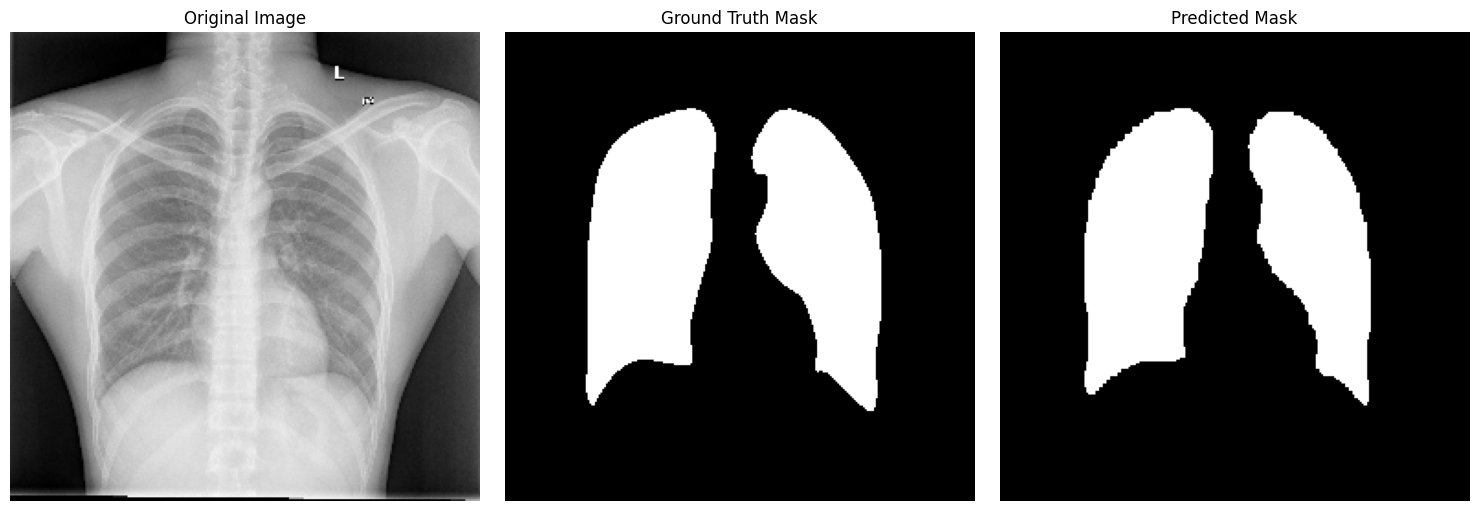

Accuracy: 0.9766
F1 Score: 0.9491


In [ ]:
import numpy as np
import cv2
import os
import pywt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score
def load_and_preprocess_image(image_path, wavelet='db4', image_size=(256, 256)):
    if not os.path.exists(image_path):
        raise ValueError(f"Image not found: {image_path}")

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image could not be loaded: {image_path}")

    img_resized = cv2.resize(img, image_size) / 255.0

    coeffs2 = pywt.dwt2(img_resized, wavelet)

    if coeffs2 is None or len(coeffs2) != 2:
        raise ValueError("Wavelet transformation failed to produce coefficients.")

    LL, (LH, HL, HH) = coeffs2

    LL = cv2.resize(LL, image_size)
    LH = cv2.resize(LH, image_size)
    HL = cv2.resize(HL, image_size)
    HH = cv2.resize(HH, image_size)

    wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)

    return img_resized, wavelet_image


# Load and preprocess the image
image_path = "/content/dataset/images/CHNCXR_0005_0.png"  # Replace with your actual image path
mask_path = "/content/dataset/masks/CHNCXR_0005_0.png" # Replace with your actual mask path



def load_ground_truth_mask(mask_path, image_size=(256, 256)):
    if not os.path.exists(mask_path):
        raise ValueError(f"Ground truth mask not found: {mask_path}")

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise ValueError(f"Ground truth mask could not be loaded: {mask_path}")

    mask_resized = cv2.resize(mask, image_size)
    # Ensure the mask is binary
    mask_binary = (mask_resized > 127).astype(np.uint8)
    return mask_binary

original_image, preprocessed_image = load_and_preprocess_image(image_path)
ground_truth_mask = load_ground_truth_mask(mask_path)

# Add a batch dimension for model prediction
preprocessed_image_batch = np.expand_dims(preprocessed_image, axis=0)

print(f"Preprocessed image shape: {preprocessed_image_batch.shape}")

# Make prediction
predicted_mask = seg_model.predict(preprocessed_image_batch,4)

# Ensure the predicted mask is binary
predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(ground_truth_mask, cmap='gray')
axes[1].set_title('Ground Truth Mask')
axes[1].axis('off')

axes[2].imshow(predicted_mask_binary[0, :, :, 0], cmap='gray')
axes[2].set_title('Predicted Mask')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Calculate and print metrics
predicted_flat = predicted_mask_binary[0, :, :, 0].flatten()
ground_truth_flat = ground_truth_mask.flatten()

accuracy = accuracy_score(ground_truth_flat, predicted_flat)
f1 = f1_score(ground_truth_flat, predicted_flat)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

**MODEL Metrics**

In [ ]:
from sklearn.metrics import jaccard_score, f1_score

def compute_metrics(model, data_gen):
    y_true = []
    y_pred = []

    for i in range(len(data_gen)):
        images, masks = data_gen[i]
        preds = model.predict(images,4)
        preds = (preds > 0.5).astype(np.uint8)  # Threshold predictions

        # Flatten and convert masks to binary if they aren't already
        y_true.append((masks > 0.5).astype(np.uint8).flatten())  # Ensure y_true is binary
        y_pred.append(preds.flatten())

    # Convert lists to arrays
    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)

    # Calculate IoU
    iou = jaccard_score(y_true, y_pred, average='binary')

    # Calculate Dice Coefficient
    dice = f1_score(y_true, y_pred)

    return iou, dice

iou, dice = compute_metrics(seg_model, val_data_gen)
print("Val IoU:", iou)
print("Val Dice Coefficient:", dice)

1/1 [==============================] - 1s 592ms/step
Val IoU: 0.9145872899616909
Val Dice Coefficient: 0.9553884482122421


In [ ]:
#save model:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.saved_model.save(seg_model, "NAPWUNET_saved_model")

ValueError: Expected an object of type `Trackable`, such as `tf.Module` or a subclass of the `Trackable` class, for export. Got <__main__.SegModel object at 0x7b8b71f57340> with type <class '__main__.SegModel'>.

In [ ]:
# Specify the Google Drive path where you want to save the model
model_drive_path = '/content/drive/My Drive/NAPWUNET.h5'
shutil.move("NAPWUNET.h5", model_drive_path)
print(f"Model saved to: {model_drive_path}")

Model saved to: /content/drive/My Drive/NAPWUNET.h5


In [ ]:
import os
import numpy as np
from sklearn.metrics import jaccard_score, f1_score
import cv2
import pywt

class TestWaveletDataGenerator:
    def __init__(self, image_folder, mask_folder, image_size=(256, 256), wavelet='db4'):
        self.image_paths = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder)])
        self.mask_paths = sorted([os.path.join(mask_folder, f) for f in os.listdir(mask_folder)])
        self.image_size = image_size
        self.wavelet = wavelet

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        img_path = self.image_paths[index]
        mask_path = self.mask_paths[index]

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.image_size) / 255.0

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, self.image_size) / 255.0
        mask = np.expand_dims(mask, axis=-1)

        coeffs2 = pywt.dwt2(img, self.wavelet)
        LL, (LH, HL, HH) = coeffs2

        wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)
        wavelet_image = cv2.resize(wavelet_image, self.image_size)

        return np.expand_dims(wavelet_image, axis=0), np.expand_dims(mask, axis=0)

def compute_metrics(model, data_gen, batch_size=32):
    y_true = []
    y_pred = []

    for i in range(len(data_gen)):
        print(f"Processing image {i+1}/{len(data_gen)}")

        image, mask = data_gen[i]
        pred = model.predict(image,8)
        pred = (pred > 0.5).astype(np.uint8)

        y_true.append((mask > 0.5).astype(np.uint8).flatten())
        y_pred.append(pred.flatten())

        if len(y_true) == batch_size or i == len(data_gen) - 1:
            y_true_batch = np.concatenate(y_true)
            y_pred_batch = np.concatenate(y_pred)

            if i == len(data_gen) - 1:
                # Final batch, compute and return metrics
                iou = jaccard_score(y_true_batch, y_pred_batch, average='binary')
                dice = f1_score(y_true_batch, y_pred_batch, average='binary')
                return iou, dice
            else:
                # Reset lists for next batch
                y_true = []
                y_pred = []

    # This should not be reached
    return None, None

# Usage
TEST_IMAGE_PATH = "/content/dataset/test"
TEST_MASK_PATH = "/content/dataset/test_masks"

test_data_gen = TestWaveletDataGenerator(TEST_IMAGE_PATH, TEST_MASK_PATH)

iou, dice = compute_metrics(seg_model, test_data_gen)
print("Test IoU:", iou)
print("Test Dice Coefficient:", dice)

Processing image 1/70
1/1 [==============================] - 0s 234ms/step
Processing image 2/70
1/1 [==============================] - 0s 210ms/step
Processing image 3/70
1/1 [==============================] - 0s 219ms/step
Processing image 4/70
1/1 [==============================] - 0s 219ms/step
Processing image 5/70
1/1 [==============================] - 0s 216ms/step
Processing image 6/70
1/1 [==============================] - 0s 224ms/step
Processing image 7/70
1/1 [==============================] - 0s 234ms/step
Processing image 8/70
1/1 [==============================] - 0s 210ms/step
Processing image 9/70
1/1 [==============================] - 0s 215ms/step
Processing image 10/70
1/1 [==============================] - 0s 214ms/step
Processing image 11/70
1/1 [==============================] - 0s 208ms/step
Processing image 12/70
1/1 [==============================] - 0s 206ms/step
Processing image 13/70
1/1 [==============================] - 0s 208ms/step
Processing image 14/7